In [1]:
# clonar repo en colab
# !git clone https://github.com/ignacio-ave/ADA-Portafolio.git



In [2]:
# path en google colab : /content/ADA-Portafolio/Backpropagation/MNIST DATABASE

# Importamos las bibliotecas necesarias
import numpy as np
import struct

# Funciones para cargar los datos MNIST
def load_images(filename):
    with open(filename, "rb") as f:
        data = f.read()
        _, num_images, rows, cols = struct.unpack(">IIII", data[:16])
        images = np.frombuffer(data[16:], dtype=np.uint8).reshape(num_images, rows * cols)
        images = images.astype(np.float32) / 255.0  # Normalización
    return images

def load_labels(filename):
    with open(filename, "rb") as f:
        data = f.read()
        _, num_labels = struct.unpack(">II", data[:8])
        labels = np.frombuffer(data[8:], dtype=np.uint8)
    return labels

# Cargamos los datos de entrenamiento y de prueba

# /content/ADA-Portafolio/Backpropagation/MNIST DATABASE
path = input("Ingrese la ruta de la carpeta MNIST DATABASE: ")
X_train = load_images(path+"/train-images.idx3-ubyte")
y_train = load_labels(path+"/train-labels.idx1-ubyte")
X_test = load_images(path+"/t10k-images.idx3-ubyte")
y_test = load_labels(path+"/t10k-labels.idx1-ubyte")

# Convertimos las etiquetas a representación one-hot
num_classes = 10
y_train_one_hot = np.eye(num_classes)[y_train]
y_test_one_hot = np.eye(num_classes)[y_test]

# Verificamos las dimensiones de los datos
X_train.shape, y_train_one_hot.shape, X_test.shape, y_test_one_hot.shape


((60000, 784), (60000, 10), (10000, 784), (10000, 10))

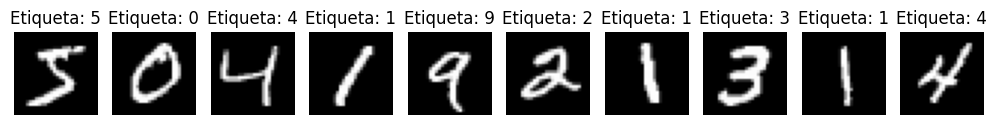

In [3]:
import matplotlib.pyplot as plt

def visualizar_imagenes(imagenes, etiquetas, num_muestras=10):
    """
    Visualiza un conjunto de imágenes con sus respectivas etiquetas.
    
    :param imagenes: Array de imágenes
    :param etiquetas: Array de etiquetas
    :param num_muestras: Número de muestras que se quieren visualizar
    """
    fig, axes = plt.subplots(1, num_muestras, figsize=(10, 2))
    
    for i, ax in enumerate(axes):
        # Redimensionar la imagen de (784,) a (28, 28)
        imagen = imagenes[i].reshape(28, 28)
        ax.imshow(imagen, cmap='gray')
        ax.set_title(f'Etiqueta: {etiquetas[i]}')
        ax.axis('off')
        
    plt.tight_layout()
    plt.show()

# Visualizar algunas imágenes del conjunto de entrenamiento
visualizar_imagenes(X_train, y_train)


In [4]:
# Definición e inicialización de la red neuronal usando NumPy

# Tamaño de las capas
input_size = 784  # Capa de entrada (28 * 28 píxeles)
hidden_size = 128  # Capa oculta con 128 unidades
output_size = 10   # Capa de salida (10 clases)

# Inicialización de los pesos y biases
np.random.seed(42)  # Semilla para reproducibilidad
W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2. / input_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2. / hidden_size)
b2 = np.zeros((1, output_size))

# Funciones de activación y sus derivadas
def relu(Z):
    return np.maximum(0, Z)

def relu_derivative(Z):
    return (Z > 0).astype(Z.dtype)

def softmax(Z):
    expZ = np.exp(Z - np.max(Z))
    return expZ / expZ.sum(axis=1, keepdims=True)

# Función de pérdida de Entropía Cruzada Categórica
def cross_entropy_loss(Y_true, Y_pred):
    m = Y_true.shape[0]
    loss = -np.sum(Y_true * np.log(Y_pred + 1e-8)) / m
    return loss

def cross_entropy_loss_derivative(Y_true, Y_pred):
    return Y_pred - Y_true

# Forward Propagation
def forward_propagation(X):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

# Backward Propagation
def backward_propagation(X, Y, Z1, A1, Z2, A2):
    m = X.shape[0]
    
    dZ2 = cross_entropy_loss_derivative(Y, A2)
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    
    dZ1 = np.dot(dZ2, W2.T) * relu_derivative(Z1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m
    
    return dW1, db1, dW2, db2

# Actualización de los pesos y biases
def update_parameters(dW1, db1, dW2, db2, learning_rate):
    global W1, b1, W2, b2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

# Entrenamiento de la red neuronal
def train(X, Y, learning_rate=0.1, epochs=100):
    loss_history = []
    for epoch in range(epochs):
        Z1, A1, Z2, A2 = forward_propagation(X)
        loss = cross_entropy_loss(Y, A2)
        dW1, db1, dW2, db2 = backward_propagation(X, Y, Z1, A1, Z2, A2)
        update_parameters(dW1, db1, dW2, db2, learning_rate)
        
        loss_history.append(loss)
        
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")
    
    return loss_history

# Entrenamos la red neuronal
loss_history = train(X_train, y_train_one_hot)


Epoch 0, Loss: 2.4117
Epoch 10, Loss: 1.6198
Epoch 20, Loss: 1.1513
Epoch 30, Loss: 0.8904
Epoch 40, Loss: 0.7423
Epoch 50, Loss: 0.6509
Epoch 60, Loss: 0.5896
Epoch 70, Loss: 0.5457
Epoch 80, Loss: 0.5126
Epoch 90, Loss: 0.4868


In [5]:
def predict(X):
    _, _, _, A2 = forward_propagation(X)
    predictions = np.argmax(A2, axis=1)
    return predictions

In [7]:

# Caso 1
# 
num_samples = 14
test_samples = X_test[:num_samples]
true_labels = y_test[:num_samples]
predicted_labels = predict(test_samples)

# Display the true labels and the predicted labels for comparison
true_labels, predicted_labels


(array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0], dtype=uint8),
 array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0]))

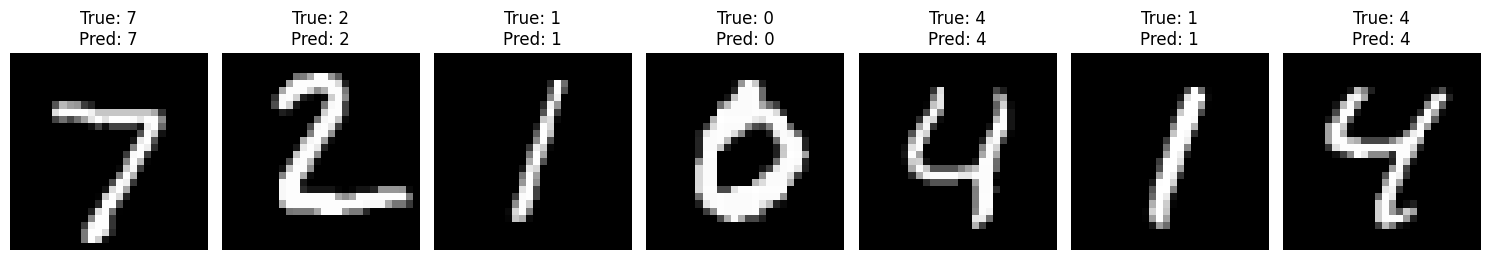

In [ ]:
# Function to visualize images along with their true labels and predicted labels
def visualizar_predicciones(imagenes, etiquetas_verdaderas, etiquetas_predichas, num_muestras=20):
    fig, axes = plt.subplots(1, num_muestras, figsize=(15, 3))
    
    for i, ax in enumerate(axes):
        # Reshape the image from (784,) to (28, 28)
        imagen = imagenes[i].reshape(28, 28)
        ax.imshow(imagen, cmap='gray')
        ax.set_title(f'True: {etiquetas_verdaderas[i]}\nPred: {etiquetas_predichas[i]}')
        ax.axis('off')
        
    plt.tight_layout()
    plt.show()

# Visualize the images, true labels and predicted labels using the function
visualizar_predicciones(test_samples, true_labels, predicted_labels, num_muestras=num_samples)


In [ ]:
!pip -q install ipywidgets pillow
!pip -q install ipycanvas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.7/255.7 kB 6.8 MB/s eta 0:00:00a 0:00:01


Epoch 0, Loss: 2.3911
Epoch 0, Loss: 2.4148
Epoch 0, Loss: 2.4147
Epoch 0, Loss: 2.4146
Epoch 0, Loss: 2.4162
Epoch 0, Loss: 2.4116
Epoch 0, Loss: 2.4117


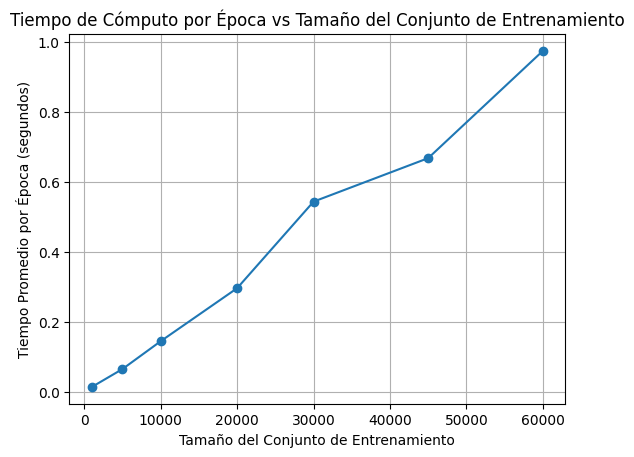

[0.014387917518615723,
 0.0654839038848877,
 0.14499709606170655,
 0.29638803005218506,
 0.543653130531311,
 0.6678877592086792,
 0.9741727352142334]

In [13]:
import time

# Definimos diferentes tamaños de subconjuntos para el entrenamiento
subset_sizes = [1000, 5000, 10000,20000, 30000,45000, 60000]

# Almacenaremos el tiempo promedio que tarda cada época para cada tamaño de subconjunto
time_per_epoch = []

# Usaremos una tasa de aprendizaje fija y un número fijo de épocas para este experimento
learning_rate = 0.1
epochs = 10

for subset_size in subset_sizes:
    # Tomamos un subconjunto de los datos de entrenamiento
    X_train_subset = X_train[:subset_size]
    y_train_subset = y_train_one_hot[:subset_size]
    
    # Re-inicializamos los pesos y biases de la red
    np.random.seed(42)
    W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2. / input_size)
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2. / hidden_size)
    b2 = np.zeros((1, output_size))
    
    # Medimos el tiempo de inicio
    start_time = time.time()
    
    # Entrenamos la red neuronal
    train(X_train_subset, y_train_subset, learning_rate, epochs)
    
    # Medimos el tiempo de finalización
    end_time = time.time()
    
    # Calculamos el tiempo promedio por época
    avg_time_per_epoch = (end_time - start_time) / epochs
    
    # Almacenamos el resultado
    time_per_epoch.append(avg_time_per_epoch)

# Graficamos los resultados
plt.plot(subset_sizes, time_per_epoch, marker='o')
plt.title('Tiempo de Cómputo por Época vs Tamaño del Conjunto de Entrenamiento')
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('Tiempo Promedio por Época (segundos)')
plt.grid(True)
plt.show()

# Retornamos los tiempos promedio por época para cada tamaño de subconjunto
time_per_epoch


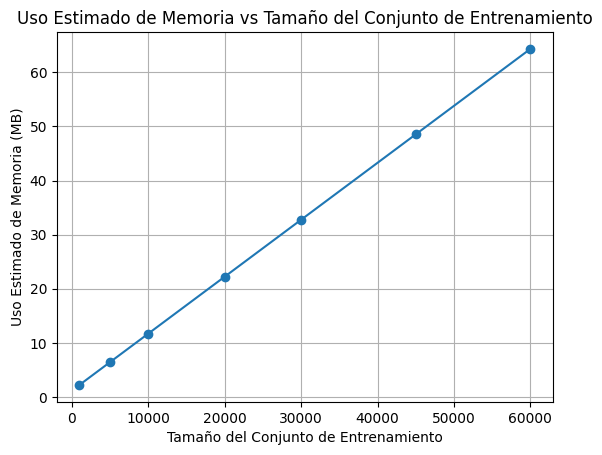

[2.2164688110351562,
 6.427894592285156,
 11.692176818847656,
 22.220741271972656,
 32.749305725097656,
 48.542152404785156,
 64.33499908447266]

In [14]:
# Función para estimar el uso de memoria durante el entrenamiento
def estimate_memory_usage(input_size, hidden_size, output_size, batch_size):
    """
    Estima el uso de memoria durante el entrenamiento de una red neuronal de dos capas.
    
    Parámetros:
    - input_size: Número de unidades en la capa de entrada.
    - hidden_size: Número de unidades en la capa oculta.
    - output_size: Número de unidades en la capa de salida.
    - batch_size: Tamaño del lote de datos.
    
    Retorna:
    - Uso estimado de memoria en megabytes (MB).
    """
    # Pesos y biases
    params_size = (input_size * hidden_size + hidden_size * output_size + hidden_size + output_size) * 4  # en bytes
    
    # Variables intermedias (Z1, A1, Z2, A2, dZ1, dZ2, dW1, dW2, db1, db2)
    intermediate_size = (2 * batch_size * hidden_size + 2 * batch_size * output_size + 2 * input_size * hidden_size + 2 * hidden_size * output_size) * 4  # en bytes
    
    # Conversión de bytes a megabytes
    total_size_MB = (params_size + intermediate_size) / (1024 * 1024)
    
    return total_size_MB

# Estimamos el uso de memoria para diferentes tamaños de subconjuntos del conjunto de entrenamiento
memory_usage = [estimate_memory_usage(input_size, hidden_size, output_size, subset_size) for subset_size in subset_sizes]

# Graficamos los resultados
plt.plot(subset_sizes, memory_usage, marker='o')
plt.title('Uso Estimado de Memoria vs Tamaño del Conjunto de Entrenamiento')
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('Uso Estimado de Memoria (MB)')
plt.grid(True)
plt.show()

# Retornamos el uso estimado de memoria para cada tamaño de subconjunto
memory_usage


Epoch 0, Loss: 2.4139
Epoch 0, Loss: 2.4139
Epoch 10, Loss: 1.6062
Epoch 20, Loss: 1.1402
Epoch 30, Loss: 0.8835
Epoch 40, Loss: 0.7374
Epoch 0, Loss: 2.4139
Epoch 10, Loss: 1.6062
Epoch 20, Loss: 1.1402
Epoch 30, Loss: 0.8835
Epoch 40, Loss: 0.7374
Epoch 50, Loss: 0.6466
Epoch 60, Loss: 0.5852
Epoch 70, Loss: 0.5411
Epoch 80, Loss: 0.5077
Epoch 90, Loss: 0.4815
Epoch 0, Loss: 2.4139
Epoch 10, Loss: 1.6062
Epoch 20, Loss: 1.1402
Epoch 30, Loss: 0.8835
Epoch 40, Loss: 0.7374
Epoch 50, Loss: 0.6466
Epoch 60, Loss: 0.5852
Epoch 70, Loss: 0.5411
Epoch 80, Loss: 0.5077
Epoch 90, Loss: 0.4815
Epoch 100, Loss: 0.4603
Epoch 110, Loss: 0.4427
Epoch 120, Loss: 0.4277
Epoch 130, Loss: 0.4148
Epoch 140, Loss: 0.4035
Epoch 150, Loss: 0.3935
Epoch 160, Loss: 0.3845
Epoch 170, Loss: 0.3764
Epoch 180, Loss: 0.3690
Epoch 190, Loss: 0.3623


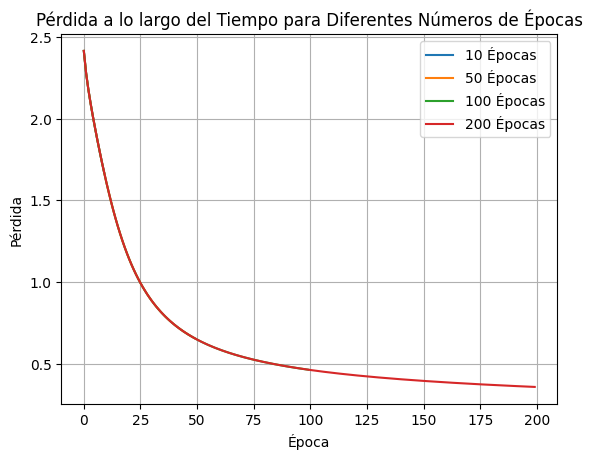

[[2.4139081817449135,
  2.2789320065899408,
  2.1781553207292323,
  2.0918957137261716,
  2.0128710720065923,
  1.9382546061189618,
  1.8667197126629471,
  1.7978071211717341,
  1.7314032587413735,
  1.6675131787458795],
 [2.4139081817449135,
  2.2789320065899408,
  2.1781553207292323,
  2.0918957137261716,
  2.0128710720065923,
  1.9382546061189618,
  1.8667197126629471,
  1.7978071211717341,
  1.7314032587413735,
  1.6675131787458795,
  1.6062071535639106,
  1.5476059102358162,
  1.4917424313469132,
  1.4386215516335918,
  1.388252616504739,
  1.3405903163869786,
  1.2955770599587586,
  1.2531256043814811,
  1.2131851583318523,
  1.1756051428810907,
  1.140235248757152,
  1.1070042539728364,
  1.0757820162857288,
  1.046427620267707,
  1.0188128166565003,
  0.9928160295823446,
  0.9683276266375191,
  0.9452398303811509,
  0.92346263036912,
  0.9029250525706316,
  0.8835359119422811,
  0.8652106594422706,
  0.8478669137776687,
  0.8314454382631004,
  0.8158765200562544,
  0.8011004313

In [12]:
# Definimos diferentes números de épocas para el entrenamiento
epoch_counts = [10, 50, 100, 200]

# Almacenaremos la historia de pérdida para cada número de épocas
loss_histories = []

# Usaremos una tasa de aprendizaje fija y un tamaño de subconjunto de entrenamiento fijo para este experimento
learning_rate = 0.1
subset_size = 15000

# Tomamos un subconjunto de los datos de entrenamiento
X_train_subset = X_train[:subset_size]
y_train_subset = y_train_one_hot[:subset_size]

for epoch_count in epoch_counts:
    # Re-inicializamos los pesos y biases de la red
    np.random.seed(42)
    W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2. / input_size)
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2. / hidden_size)
    b2 = np.zeros((1, output_size))
    
    # Entrenamos la red neuronal y almacenamos la historia de pérdida
    loss_history = train(X_train_subset, y_train_subset, learning_rate, epoch_count)
    loss_histories.append(loss_history)

# Graficamos los resultados
for epoch_count, loss_history in zip(epoch_counts, loss_histories):
    plt.plot(loss_history, label=f'{epoch_count} Épocas')

plt.title('Pérdida a lo largo del Tiempo para Diferentes Números de Épocas')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()

# Retornamos las historias de pérdida para cada número de épocas
loss_histories


Epoch 0, Loss: 2.4117
Epoch 10, Loss: 2.2867
Epoch 20, Loss: 2.1873
Epoch 30, Loss: 2.1008
Epoch 40, Loss: 2.0214
Epoch 0, Loss: 2.4117
Epoch 10, Loss: 1.6198
Epoch 20, Loss: 1.1513
Epoch 30, Loss: 0.8904
Epoch 40, Loss: 0.7423
Epoch 0, Loss: 2.4117
Epoch 10, Loss: 0.9242
Epoch 20, Loss: 0.6357
Epoch 30, Loss: 0.4915
Epoch 40, Loss: 0.3793
Epoch 0, Loss: 2.4117
Epoch 10, Loss: 1.6335
Epoch 20, Loss: 0.7389
Epoch 30, Loss: 0.4354
Epoch 40, Loss: 0.3656


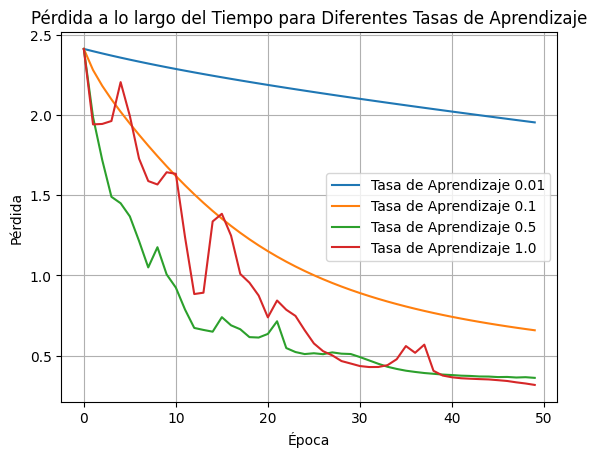

[[2.411732115512805,
  2.3974338522059537,
  2.3836227049429493,
  2.3702616291388336,
  2.3573147732995268,
  2.3447504548792377,
  2.3325369126435276,
  2.3206503954931286,
  2.309070553981662,
  2.297774115541136,
  2.2867417627886235,
  2.2759534622936104,
  2.265390159508821,
  2.255037112477466,
  2.2448779179994083,
  2.2349002826669864,
  2.225091823040088,
  2.2154422282980533,
  2.205942672489206,
  2.1965815390373478,
  2.187349508958803,
  2.17824257598819,
  2.169250945217679,
  2.160371834897399,
  2.1515943357309695,
  2.1429133588526965,
  2.1343230623870757,
  2.125818630939084,
  2.1173968792561637,
  2.109053211294588,
  2.1007832918215583,
  2.092581970146926,
  2.084445508998251,
  2.076371408046053,
  2.068356326064234,
  2.060398093821739,
  2.0524944868589587,
  2.044643420310281,
  2.0368424077568057,
  2.029091352512288,
  2.021386567759467,
  2.013725427228634,
  2.006108118120957,
  1.998533587194472,
  1.9909999720652076,
  1.9835047502660885,
  1.976047586

In [15]:
# Definimos diferentes tasas de aprendizaje para el entrenamiento
learning_rates = [0.01, 0.1, 0.5, 1.0]

# Almacenaremos la historia de pérdida para cada tasa de aprendizaje
loss_histories_lr = []

# Usaremos un número fijo de épocas y un tamaño de subconjunto de entrenamiento fijo para este experimento
epoch_count = 50

for learning_rate in learning_rates:
    # Re-inicializamos los pesos y biases de la red
    np.random.seed(42)
    W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2. / input_size)
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2. / hidden_size)
    b2 = np.zeros((1, output_size))
    
    # Entrenamos la red neuronal y almacenamos la historia de pérdida
    loss_history = train(X_train_subset, y_train_subset, learning_rate, epoch_count)
    loss_histories_lr.append(loss_history)

# Graficamos los resultados
for learning_rate, loss_history in zip(learning_rates, loss_histories_lr):
    plt.plot(loss_history, label=f'Tasa de Aprendizaje {learning_rate}')

plt.title('Pérdida a lo largo del Tiempo para Diferentes Tasas de Aprendizaje')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()

# Retornamos las historias de pérdida para cada tasa de aprendizaje
loss_histories_lr



Entrenando con Tamaño de Lote: 32
Epoch 0, Loss: 0.1798
Epoch 10, Loss: 0.0218
Epoch 20, Loss: 0.0058
Epoch 30, Loss: 0.0027
Epoch 40, Loss: 0.0016

Entrenando con Tamaño de Lote: 64
Epoch 0, Loss: 0.2408
Epoch 10, Loss: 0.0439
Epoch 20, Loss: 0.0195
Epoch 30, Loss: 0.0105
Epoch 40, Loss: 0.0057

Entrenando con Tamaño de Lote: 128
Epoch 0, Loss: 0.2910
Epoch 10, Loss: 0.0789
Epoch 20, Loss: 0.0443
Epoch 30, Loss: 0.0305
Epoch 40, Loss: 0.0185

Entrenando con Tamaño de Lote: 256
Epoch 0, Loss: 0.3515
Epoch 10, Loss: 0.1300
Epoch 20, Loss: 0.0810
Epoch 30, Loss: 0.0597
Epoch 40, Loss: 0.0443


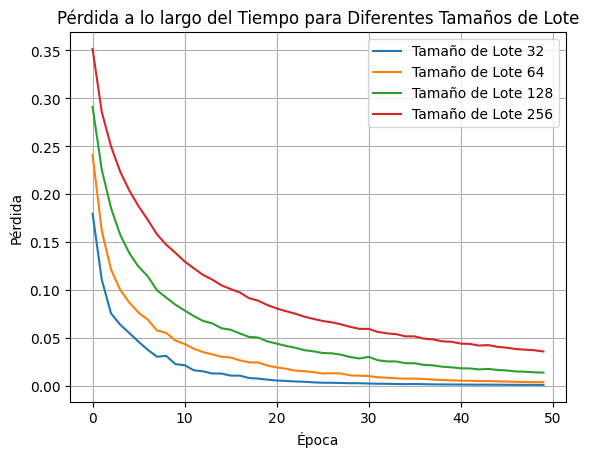

[[0.17976083637073728,
  0.11095223135777375,
  0.0758499792218535,
  0.06411788811773403,
  0.055252218879373954,
  0.046228454422318536,
  0.03785284438136333,
  0.03066162185918979,
  0.03149839502396968,
  0.022889251145866034,
  0.021814278515013556,
  0.016518336830718596,
  0.015390755502440989,
  0.013159680583700187,
  0.013100201430946569,
  0.01096811949828586,
  0.010909515332248638,
  0.008444048350101383,
  0.00780095954190955,
  0.0067345578416660706,
  0.005819397234004515,
  0.005383423266356684,
  0.004846975542818061,
  0.004533197715206915,
  0.0038772614079992792,
  0.0035256739357714174,
  0.00346784946008229,
  0.003258481493380625,
  0.003003996737575665,
  0.003007432462886751,
  0.002670323838126193,
  0.0024561509754308995,
  0.002402071159340908,
  0.002147311613654063,
  0.002043252293965198,
  0.0021827743146748337,
  0.0019876916954484018,
  0.0018192284651012706,
  0.0017174828898504219,
  0.0017001746115816055,
  0.0016118900299626252,
  0.0015486052727

In [16]:
def train_with_minibatch(X, Y, learning_rate=0.1, epochs=100, batch_size=32):
    """
    Entrena la red neuronal utilizando Mini-Batch Gradient Descent.
    
    Parámetros:
    - X: Datos de entrenamiento
    - Y: Etiquetas de entrenamiento (en formato one-hot)
    - learning_rate: Tasa de aprendizaje
    - epochs: Número de épocas de entrenamiento
    - batch_size: Tamaño del lote (mini-batch)
    
    Retorna:
    - loss_history: Lista de pérdidas calculadas en cada época
    """
    loss_history = []
    num_batches = int(X.shape[0] / batch_size)
    
    for epoch in range(epochs):
        # Mezclar los datos de entrenamiento
        permutation = np.random.permutation(X.shape[0])
        X_shuffled = X[permutation]
        Y_shuffled = Y[permutation]
        
        for batch in range(num_batches):
            # Crear un mini-batch de datos
            start = batch * batch_size
            end = min(start + batch_size, X.shape[0])
            X_mini = X_shuffled[start:end]
            Y_mini = Y_shuffled[start:end]
            
            # Forward y Backward Propagation
            Z1, A1, Z2, A2 = forward_propagation(X_mini)
            loss = cross_entropy_loss(Y_mini, A2)
            dW1, db1, dW2, db2 = backward_propagation(X_mini, Y_mini, Z1, A1, Z2, A2)
            
            # Actualización de los pesos y biases
            update_parameters(dW1, db1, dW2, db2, learning_rate)
        
        # Almacenar la pérdida después de cada época
        _, _, _, A2_full = forward_propagation(X)
        loss_full = cross_entropy_loss(Y, A2_full)
        loss_history.append(loss_full)
        
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss_full:.4f}")
    
    return loss_history

# Parámetros de entrenamiento
learning_rate = 0.1
epochs = 50
batch_sizes = [32, 64, 128, 256]

# Historias de pérdida para diferentes tamaños de lote
loss_histories_batch = []

# Entrenamos la red neuronal con diferentes tamaños de lote y almacenamos las historias de pérdida
for batch_size in batch_sizes:
    # Re-inicializamos los pesos y biases de la red para cada experimento
    np.random.seed(42)
    W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2. / input_size)
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2. / hidden_size)
    b2 = np.zeros((1, output_size))
    
    print(f"\nEntrenando con Tamaño de Lote: {batch_size}")
    loss_history = train_with_minibatch(X_train_subset, y_train_subset, learning_rate, epochs, batch_size)
    loss_histories_batch.append(loss_history)

# Graficamos los resultados
for batch_size, loss_history in zip(batch_sizes, loss_histories_batch):
    plt.plot(loss_history, label=f'Tamaño de Lote {batch_size}')

plt.title('Pérdida a lo largo del Tiempo para Diferentes Tamaños de Lote')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()

# Retornamos las historias de pérdida para cada tamaño de lote
loss_histories_batch


In [17]:

from sklearn.metrics import accuracy_score

# Tomamos un pequeño subconjunto del conjunto de datos de prueba
small_test_size = 3000
X_test_small = X_test[:small_test_size]
y_test_small = y_test[:small_test_size]

# Usamos el modelo entrenado para hacer predicciones en este subconjunto de datos de prueba
predicted_labels_small = predict(X_test_small)

# Calculamos la precisión del modelo en este subconjunto de datos de prueba
accuracy_small = accuracy_score(y_test_small, predicted_labels_small)

# Mostramos las etiquetas verdaderas y las etiquetas predichas para comparación
true_vs_predicted_small = list(zip(y_test_small, predicted_labels_small))

# Retornamos la precisión y la comparación de las etiquetas verdaderas y predichas
accuracy_small, true_vs_predicted_small


(0.966,
 [(7, 7),
  (2, 2),
  (1, 1),
  (0, 0),
  (4, 4),
  (1, 1),
  (4, 4),
  (9, 9),
  (5, 5),
  (9, 9),
  (0, 0),
  (6, 6),
  (9, 9),
  (0, 0),
  (1, 1),
  (5, 5),
  (9, 9),
  (7, 7),
  (3, 3),
  (4, 4),
  (9, 9),
  (6, 6),
  (6, 6),
  (5, 5),
  (4, 4),
  (0, 0),
  (7, 7),
  (4, 4),
  (0, 0),
  (1, 1),
  (3, 3),
  (1, 1),
  (3, 3),
  (4, 4),
  (7, 7),
  (2, 2),
  (7, 7),
  (1, 1),
  (2, 2),
  (1, 1),
  (1, 1),
  (7, 7),
  (4, 4),
  (2, 2),
  (3, 3),
  (5, 5),
  (1, 1),
  (2, 2),
  (4, 4),
  (4, 4),
  (6, 6),
  (3, 3),
  (5, 5),
  (5, 5),
  (6, 6),
  (0, 0),
  (4, 4),
  (1, 1),
  (9, 9),
  (5, 5),
  (7, 7),
  (8, 2),
  (9, 9),
  (3, 3),
  (7, 7),
  (4, 4),
  (6, 6),
  (4, 4),
  (3, 3),
  (0, 0),
  (7, 7),
  (0, 0),
  (2, 2),
  (9, 9),
  (1, 1),
  (7, 7),
  (3, 3),
  (2, 2),
  (9, 9),
  (7, 7),
  (7, 7),
  (6, 6),
  (2, 2),
  (7, 7),
  (8, 8),
  (4, 4),
  (7, 7),
  (3, 3),
  (6, 6),
  (1, 1),
  (3, 3),
  (6, 6),
  (9, 9),
  (3, 3),
  (1, 1),
  (4, 4),
  (1, 1),
  (7, 7),
  (6, 6),
  